In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model

from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as smf
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [3]:
# READ TXT
products_subsets = pd.read_csv('17x7.txt', delimiter = " ", header=None)
products_subsets

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,0,84.00,0.0,20.43,2,37.33,0.00,3.32,3,62.67,...,42.99,10,70.67,0.0,14.69,14,52.00,0.0,6.81,425.8133
1,2,45.33,0.0,4.38,4,12.00,0.00,0.46,6,60.00,...,14.24,11,88.00,0.0,25.34,13,100.00,12.0,42.07,409.8400
2,3,56.00,0.0,10.83,8,12.00,0.00,0.80,9,65.33,...,43.73,12,25.33,0.0,1.84,14,42.67,0.0,6.00,365.1733
3,2,38.67,0.0,3.85,4,9.33,0.00,0.37,6,54.67,...,15.25,10,85.33,0.0,23.06,12,21.33,0.0,1.56,380.3200
4,3,81.33,0.0,24.34,4,29.33,0.00,1.54,5,12.00,...,47.25,12,48.00,0.0,4.84,16,64.00,0.0,16.56,298.6933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7837,1,66.67,0.0,16.01,2,25.33,0.00,1.91,6,38.67,...,0.64,10,57.33,0.0,9.93,13,86.67,0.0,26.24,466.0000
7838,0,68.00,0.0,13.84,1,82.67,0.00,25.30,2,26.67,...,39.00,12,17.33,0.0,1.07,14,38.67,0.0,4.73,425.0133
7839,3,45.33,0.0,6.74,6,58.67,0.00,9.58,7,98.67,...,0.60,13,86.67,0.0,25.85,15,30.67,0.0,4.04,468.6667
7840,0,89.33,0.0,22.61,1,98.67,9.33,38.77,2,33.33,...,0.52,6,58.67,0.0,10.37,10,73.33,0.0,15.66,432.6933


In [4]:
# NAME THE COLUMNS
products_subsets.columns = ['p1', 'p1_buyers_perc', 'p1_only_buyers_perc', 'p1_percentage_contribution',
              'p2', 'p2_buyers_perc', 'p2_only_buyers_perc', 'p2_percentage_contribution',
              'p3', 'p3_buyers_perc', 'p3_only_buyers_perc', 'p3_percentage_contribution',
              'p4', 'p4_buyers_perc', 'p4_only_buyers_perc', 'p4_percentage_contribution',
              'p5', 'p5_buyers_perc', 'p5_only_buyers_perc', 'p5_percentage_contribution',
              'p6', 'p6_buyers_perc', 'p6_only_buyers_perc', 'p6_percentage_contribution',
              'p7', 'p7_buyers_perc', 'p7_only_buyers_perc', 'p7_percentage_contribution', 'average_income']
products_subsets

,p1,p1_buyers_perc,p1_only_buyers_perc,p1_percentage_contribution,p2,p2_buyers_perc,p2_only_buyers_perc,p2_percentage_contribution,p3,p3_buyers_perc,...,p5_percentage_contribution,p6,p6_buyers_perc,p6_only_buyers_perc,p6_percentage_contribution,p7,p7_buyers_perc,p7_only_buyers_perc,p7_percentage_contribution,average_income
0,0,84.00,0.0,20.43,2,37.33,0.00,3.32,3,62.67,...,42.99,10,70.67,0.0,14.69,14,52.00,0.0,6.81,425.8133
1,2,45.33,0.0,4.38,4,12.00,0.00,0.46,6,60.00,...,14.24,11,88.00,0.0,25.34,13,100.00,12.0,42.07,409.8400
2,3,56.00,0.0,10.83,8,12.00,0.00,0.80,9,65.33,...,43.73,12,25.33,0.0,1.84,14,42.67,0.0,6.00,365.1733
3,2,38.67,0.0,3.85,4,9.33,0.00,0.37,6,54.67,...,15.25,10,85.33,0.0,23.06,12,21.33,0.0,1.56,380.3200
4,3,81.33,0.0,24.34,4,29.33,0.00,1.54,5,12.00,...,47.25,12,48.00,0.0,4.84,16,64.00,0.0,16.56,298.6933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7837,1,66.67,0.0,16.01,2,25.33,0.00,1.91,6,38.67,...,0.64,10,57.33,0.0,9.93,13,86.67,0.0,26.24,466.0000
7838,0,68.00,0.0,13.84,1,82.67,0.00,25.30,2,26.67,...,39.00,12,17.33,0.0,1.07,14,38.67,0.0,4.73,425.0133
7839,3,45.33,0.0,6.74,6,58.67,0.00,9.58,7,98.67,...,0.60,13,86.67,0.0,25.85,15,30.67,0.0,4.04,468.6667
7840,0,89.33,0.0,22.61,1,98.67,9.33,38.77,2,33.33,...,0.52,6,58.67,0.0,10.37,10,73.33,0.0,15.66,432.6933


In [5]:
products_subsets['SetID'] = products_subsets.index
products_subsets

,p1,p1_buyers_perc,p1_only_buyers_perc,p1_percentage_contribution,p2,p2_buyers_perc,p2_only_buyers_perc,p2_percentage_contribution,p3,p3_buyers_perc,...,p6,p6_buyers_perc,p6_only_buyers_perc,p6_percentage_contribution,p7,p7_buyers_perc,p7_only_buyers_perc,p7_percentage_contribution,average_income,SetID
0,0,84.00,0.0,20.43,2,37.33,0.00,3.32,3,62.67,...,10,70.67,0.0,14.69,14,52.00,0.0,6.81,425.8133,0
1,2,45.33,0.0,4.38,4,12.00,0.00,0.46,6,60.00,...,11,88.00,0.0,25.34,13,100.00,12.0,42.07,409.8400,1
2,3,56.00,0.0,10.83,8,12.00,0.00,0.80,9,65.33,...,12,25.33,0.0,1.84,14,42.67,0.0,6.00,365.1733,2
3,2,38.67,0.0,3.85,4,9.33,0.00,0.37,6,54.67,...,10,85.33,0.0,23.06,12,21.33,0.0,1.56,380.3200,3
4,3,81.33,0.0,24.34,4,29.33,0.00,1.54,5,12.00,...,12,48.00,0.0,4.84,16,64.00,0.0,16.56,298.6933,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7837,1,66.67,0.0,16.01,2,25.33,0.00,1.91,6,38.67,...,10,57.33,0.0,9.93,13,86.67,0.0,26.24,466.0000,7837
7838,0,68.00,0.0,13.84,1,82.67,0.00,25.30,2,26.67,...,12,17.33,0.0,1.07,14,38.67,0.0,4.73,425.0133,7838
7839,3,45.33,0.0,6.74,6,58.67,0.00,9.58,7,98.67,...,13,86.67,0.0,25.85,15,30.67,0.0,4.04,468.6667,7839
7840,0,89.33,0.0,22.61,1,98.67,9.33,38.77,2,33.33,...,6,58.67,0.0,10.37,10,73.33,0.0,15.66,432.6933,7840


In [6]:
# CREATE DATAFRAME WITH ONLY PRODUCTS AND INCOMES OF THESE PRODUCTS

prod_with_incomes = pd.DataFrame()
prod_with_incomes['SetID'] = products_subsets.index
prod_with_incomes['p1_income'] = (products_subsets['p1_percentage_contribution'] * products_subsets['average_income'] / 100)
prod_with_incomes['p2_income'] = (products_subsets['p2_percentage_contribution'] * products_subsets['average_income'] / 100)
prod_with_incomes['p3_income'] = (products_subsets['p3_percentage_contribution'] * products_subsets['average_income'] / 100)
prod_with_incomes['p4_income'] = (products_subsets['p4_percentage_contribution'] * products_subsets['average_income'] / 100)
prod_with_incomes['p5_income'] = (products_subsets['p5_percentage_contribution'] * products_subsets['average_income'] / 100)
prod_with_incomes['p6_income'] = (products_subsets['p6_percentage_contribution'] * products_subsets['average_income'] / 100)
prod_with_incomes['p7_income'] = (products_subsets['p7_percentage_contribution'] * products_subsets['average_income'] / 100)
prod_with_incomes['p1'] = products_subsets['p1']
prod_with_incomes['p2'] = products_subsets['p2']
prod_with_incomes['p3'] = products_subsets['p3']
prod_with_incomes['p4'] = products_subsets['p4']
prod_with_incomes['p5'] = products_subsets['p5']
prod_with_incomes['p6'] = products_subsets['p6']
prod_with_incomes['p7'] = products_subsets['p7']
prod_with_incomes

,SetID,p1_income,p2_income,p3_income,p4_income,p5_income,p6_income,p7_income,p1,p2,p3,p4,p5,p6,p7
0,0,86.993657,14.137002,47.350439,2.725205,183.057138,62.551974,28.997886,0,2,3,4,7,10,14
1,1,17.950992,1.885264,46.721760,8.606640,58.361216,103.853456,172.419688,2,4,6,8,9,11,13
2,2,39.548268,2.921386,51.708539,77.854948,159.690284,6.719189,21.910398,3,8,9,10,11,12,14
3,3,14.642320,1.407184,41.036528,161.445840,57.998800,87.701792,5.932992,2,4,6,7,9,10,12
4,4,72.701949,4.599877,1.672682,10.693220,141.132584,14.456756,49.463610,3,4,5,8,11,12,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7837,7837,74.606600,8.900600,26.515400,172.000600,2.982400,46.273800,122.278400,1,2,6,7,8,10,13
7838,7838,58.821841,107.528365,9.350293,41.948813,165.755187,4.547642,20.103129,0,1,2,3,7,12,14
7839,7839,31.588136,44.898270,177.390346,65.707071,2.812000,121.150342,18.934135,3,6,7,10,12,13,15
7840,7840,97.831955,167.755192,12.375028,34.052963,2.250005,44.870295,67.759771,0,1,2,3,5,6,10


In [7]:
# MELT PROD_WITH_INCOMES. SAME SETID DIFFERENT PRODUCT KEEP IT INCOME. FOR EACH BASCKET EACH PRODUCT INCOME
melted_df1 = prod_with_incomes.melt(id_vars=['SetID','p1','p2','p3','p4','p5','p6','p7']).sort_values(by=['SetID','variable'])
melted_df1

,SetID,p1,p2,p3,p4,p5,p6,p7,variable,value
0,0,0,2,3,4,7,10,14,p1_income,86.993657
7842,0,0,2,3,4,7,10,14,p2_income,14.137002
15684,0,0,2,3,4,7,10,14,p3_income,47.350439
23526,0,0,2,3,4,7,10,14,p4_income,2.725205
31368,0,0,2,3,4,7,10,14,p5_income,183.057138
...,...,...,...,...,...,...,...,...,...,...
23525,7841,0,1,2,6,10,12,15,p3_income,8.832080
31367,7841,0,1,2,6,10,12,15,p4_income,34.312240
39209,7841,0,1,2,6,10,12,15,p5_income,52.875240
47051,7841,0,1,2,6,10,12,15,p6_income,3.986160


In [8]:
# MELT THE PRODUCT IDS OF EACH SETID
melted_df2 = prod_with_incomes.melt(id_vars=['SetID'], value_vars=['p1','p2','p3','p4','p5','p6','p7']).sort_values(by=['SetID','variable']).rename(columns = {'variable': 'product', 'value': 'prod_id'})
melted_df2

,SetID,product,prod_id
0,0,p1,0
7842,0,p2,2
15684,0,p3,3
23526,0,p4,4
31368,0,p5,7
...,...,...,...
23525,7841,p3,2
31367,7841,p4,6
39209,7841,p5,10
47051,7841,p6,12


In [9]:
# JOIN BY ROWS / CONCAT TWO DATAFRAMES melted_df1 AND melted_df2
final_melted_df = pd.concat([melted_df1, melted_df2], axis=1)
final_melted_df

,SetID,p1,p2,p3,p4,p5,p6,p7,variable,value,SetID,product,prod_id
0,0,0,2,3,4,7,10,14,p1_income,86.993657,0,p1,0
7842,0,0,2,3,4,7,10,14,p2_income,14.137002,0,p2,2
15684,0,0,2,3,4,7,10,14,p3_income,47.350439,0,p3,3
23526,0,0,2,3,4,7,10,14,p4_income,2.725205,0,p4,4
31368,0,0,2,3,4,7,10,14,p5_income,183.057138,0,p5,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23525,7841,0,1,2,6,10,12,15,p3_income,8.832080,7841,p3,2
31367,7841,0,1,2,6,10,12,15,p4_income,34.312240,7841,p4,6
39209,7841,0,1,2,6,10,12,15,p5_income,52.875240,7841,p5,10
47051,7841,0,1,2,6,10,12,15,p6_income,3.986160,7841,p6,12


In [10]:
# CLEAR AND PRODUCE DATAFRAME THAT IS GOING TO BE ENCODED AND APPLIED TO THE MODELS
products_subsets_model = final_melted_df.drop(columns=['variable', 'product']).rename(columns={'value': 'prod_income'})
products_subsets_model = products_subsets_model[["p1", "p2", "p3", "p4", "p5", "p6", "p7", "prod_income", "prod_id"]]
products_subsets_model

,p1,p2,p3,p4,p5,p6,p7,prod_income,prod_id
0,0,2,3,4,7,10,14,86.993657,0
7842,0,2,3,4,7,10,14,14.137002,2
15684,0,2,3,4,7,10,14,47.350439,3
23526,0,2,3,4,7,10,14,2.725205,4
31368,0,2,3,4,7,10,14,183.057138,7
...,...,...,...,...,...,...,...,...,...
23525,0,1,2,6,10,12,15,8.832080,2
31367,0,1,2,6,10,12,15,34.312240,6
39209,0,1,2,6,10,12,15,52.875240,10
47051,0,1,2,6,10,12,15,3.986160,12


In [11]:
# ENCODE COLUMNS THAT CONSIST OF PRODUCTS
encoded = pd.get_dummies(products_subsets_model, columns = ['prod_id', 'p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7'])
encoded

,prod_income,prod_id_0,prod_id_1,prod_id_2,prod_id_3,prod_id_4,prod_id_5,prod_id_6,prod_id_7,prod_id_8,...,p7_7,p7_8,p7_9,p7_10,p7_11,p7_12,p7_13,p7_14,p7_15,p7_16
0,86.993657,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7842,14.137002,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
15684,47.350439,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
23526,2.725205,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
31368,183.057138,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23525,8.832080,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
31367,34.312240,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
39209,52.875240,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
47051,3.986160,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


# A QUESTION 

# Apply Regression Models (A1)

### Linear Regression

In [12]:
X = encoded.iloc[:, 1:].values
y = encoded.iloc[:, 0].values

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [14]:
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X_train, y_train) # connect model with data

LinearRegression()

In [15]:
y_pred = linear_regression.predict(X_test)
y_pred

array([ 26.6640625,  24.9609375,  13.6640625, ...,  29.0546875,
        17.7421875, 103.0546875])

In [16]:
Linear_Regr_MSE = mean_squared_error(y_test, y_pred)
Linear_Regr_Score = linear_regression.score(X_test,y_test)

print(f"The MSE is: {Linear_Regr_MSE}")
print(f"The Score is: {Linear_Regr_Score}")

The MSE is: 231.6642355077315
The Score is: 0.9219491659588473


### SVM

In [17]:
X = encoded.iloc[:, 1:].values
y = encoded.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

SVM_regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
SVM_regr.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(epsilon=0.2))])

In [18]:
y_pred = SVM_regr.predict(X_test)
y_pred

SVM_MSE = mean_squared_error(y_test, y_pred)
SVM_Score = SVM_regr.score(X_test,y_test)

print(f"The MSE is: {SVM_MSE}")
print(f"The Score is: {SVM_Score}")

The MSE is: 411.7144908990147
The Score is: 0.861287784318248


### ΚΝΝ

In [19]:
X = encoded.iloc[:, 1:].values
y = encoded.iloc[:, 0].values

# Train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

# Initialize kNN
knn = KNeighborsRegressor(n_neighbors=5)

# Fit and score
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [20]:
y_pred = knn.predict(X_test)
y_pred

KNN_MSE = mean_squared_error(y_test, y_pred)
KNN_Score = knn.score(X_test,y_test)

print(f"The MSE is: {KNN_MSE}")
print(f"The Score is: {KNN_Score}")

The MSE is: 1349.9695692681507
The Score is: 0.5536629616234117


### Neural Network

In [21]:
X = encoded.iloc[:, 1:].values
y = encoded.iloc[:, 0].values

# X, y = make_regression(n_samples=200, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
NN_regr = MLPRegressor(random_state=1, max_iter=500).fit(X_train, y_train)

y_pred = NN_regr.predict(X_test)

Neural_Net_MSE = mean_squared_error(y_test, y_pred)
Neural_Net_Score = NN_regr.score(X_test,y_test)

print(f"The MSE is: {Neural_Net_MSE}")
print(f"The Score is: {Neural_Net_Score}")

The MSE is: 41.281210431277245
The Score is: 0.9859469596656644


# Plots for A1 Question 

In [22]:
Scores_A = {'Linear Regression': Linear_Regr_Score*100, 'SVM': SVM_Score*100, 'KNN': KNN_Score*100, 'Neural Network': Neural_Net_Score*100}
Scores_A

{'Linear Regression': 92.19491659588473,
 'SVM': 86.1287784318248,
 'KNN': 55.366296162341165,
 'Neural Network': 98.59469596656643}

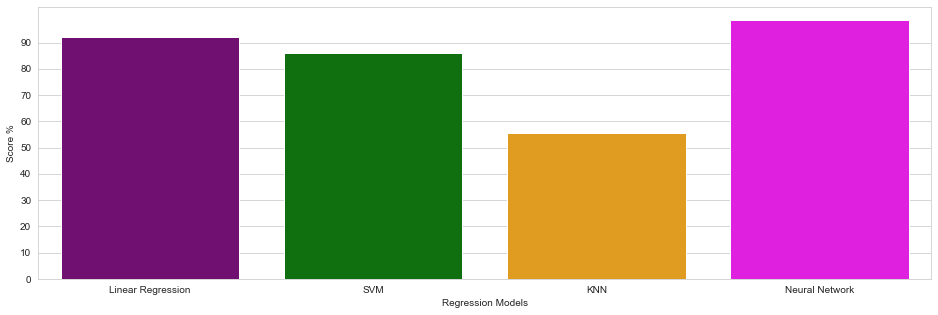

In [23]:
# PROT THE SCORES OF REGRESSION MODELS

colors = ["purple", "green", "orange", "magenta"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Score %")
plt.xlabel("Regression Models")
sns.barplot(x=list(Scores_A.keys()), y=list(Scores_A.values()), palette=colors)
plt.show()

# Apply Classification Models (A2)

### A2 Without Encoding

In [24]:
products_subsets_model = products_subsets_model[['prod_id', 'p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'prod_income']]
products_subsets_model

,prod_id,p1,p2,p3,p4,p5,p6,p7,prod_income
0,0,0,2,3,4,7,10,14,86.993657
7842,2,0,2,3,4,7,10,14,14.137002
15684,3,0,2,3,4,7,10,14,47.350439
23526,4,0,2,3,4,7,10,14,2.725205
31368,7,0,2,3,4,7,10,14,183.057138
...,...,...,...,...,...,...,...,...,...
23525,2,0,1,2,6,10,12,15,8.832080
31367,6,0,1,2,6,10,12,15,34.312240
39209,10,0,1,2,6,10,12,15,52.875240
47051,12,0,1,2,6,10,12,15,3.986160


In [25]:
X = products_subsets_model.loc[:, products_subsets_model.columns != 'prod_income'] #exclude column prod_income 
y = products_subsets_model.iloc[:,-1] 

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [27]:
# TAKE THE TRAINING SET AND THE MEAN INCOME PER PRODUCT 
training_set = X_train.copy()
training_set['prod_income'] = y_train.copy()
training_set['mean_income_per_prod'] = training_set.groupby('prod_id')['prod_income'].transform('mean')
training_set

,prod_id,p1,p2,p3,p4,p5,p6,p7,prod_income,mean_income_per_prod
8680,4,1,4,6,10,11,12,15,1.562661,2.994327
27026,10,3,4,7,10,13,14,16,72.955326,72.824550
34547,7,2,3,4,5,7,12,14,156.172224,174.558222
42480,9,1,4,5,6,8,9,12,73.536507,57.169142
45699,15,0,2,3,7,11,15,16,19.776512,30.526303
...,...,...,...,...,...,...,...,...,...,...
7151,0,0,6,9,10,12,13,14,61.580811,75.928124
28170,10,2,4,5,10,11,14,16,94.886124,72.824550
39951,14,0,3,4,8,12,14,16,45.979932,21.834726
48790,15,2,3,5,7,10,14,15,42.151200,30.526303


In [28]:
# TAKE THE TEST SET
test_set = X_test.copy()
test_set['prod_income'] = y_test.copy()
test_set

,prod_id,p1,p2,p3,p4,p5,p6,p7,prod_income
50987,14,1,3,5,8,9,10,14,12.774999
47314,16,2,5,7,11,13,15,16,47.193424
28333,12,5,6,9,12,13,14,16,7.813632
18892,8,4,5,8,10,11,13,15,8.328832
5072,3,3,5,8,9,12,13,15,59.899859
...,...,...,...,...,...,...,...,...,...
6321,2,2,5,8,10,11,12,14,25.047795
51166,16,1,5,8,9,12,14,16,61.954120
51381,15,2,3,6,7,8,10,15,25.857171
45275,14,2,7,9,11,12,14,16,24.441943


In [29]:
# DATAFRAME WITH THE PROD_ID AND THE MEAN INCOME 
training_set_prod_id_with_mean = training_set.groupby('prod_id')['prod_income'].agg([pd.np.mean])

# JOIN training_set_prod_id_with_mean AND test_set BY prod_id 
test_set_with_mean_income_per_prod = pd.merge(training_set_prod_id_with_mean, test_set, left_on='prod_id', right_on='prod_id', how='inner')
test_set_with_mean_income_per_prod = test_set_with_mean_income_per_prod.rename(columns={'mean': 'mean_income_per_prod'})
test_set_with_mean_income_per_prod

<ipython-input-29-c9bb9e5f352c>:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  training_set_prod_id_with_mean = training_set.groupby('prod_id')['prod_income'].agg([pd.np.mean])


,prod_id,mean_income_per_prod,p1,p2,p3,p4,p5,p6,p7,prod_income
0,0,75.928124,0,3,8,10,11,12,14,57.190235
1,0,75.928124,0,3,7,8,9,10,11,34.350912
2,0,75.928124,0,3,4,8,10,13,14,53.860230
3,0,75.928124,0,1,2,3,9,10,14,105.714568
4,0,75.928124,0,1,3,10,13,15,16,45.134045
...,...,...,...,...,...,...,...,...,...,...
10974,16,37.377932,2,4,7,11,12,14,16,56.431272
10975,16,37.377932,3,4,6,7,9,15,16,31.781459
10976,16,37.377932,0,1,2,5,8,13,16,33.952843
10977,16,37.377932,1,4,6,9,10,13,16,14.656694


In [30]:
# CHANGE THE LABELS INTO BINARY WITH THE NECESSARY CONDITION (CHECKING IF THE PRODUCT INCOME IS BIGER THAN THE CALCULATED MEAN UNDER TRAINING SET)

trainset_labels = (training_set['prod_income'] > training_set['mean_income_per_prod']).astype(int)
testset_labels = (test_set_with_mean_income_per_prod['prod_income'] > test_set_with_mean_income_per_prod['mean_income_per_prod']).astype(int)

In [31]:
y_train = trainset_labels
y_test = testset_labels

In [32]:
test_set = test_set_with_mean_income_per_prod.drop(columns=['mean_income_per_prod'])
X_test = test_set.drop(columns=['prod_income'])
X_test

,prod_id,p1,p2,p3,p4,p5,p6,p7
0,0,0,3,8,10,11,12,14
1,0,0,3,7,8,9,10,11
2,0,0,3,4,8,10,13,14
3,0,0,1,2,3,9,10,14
4,0,0,1,3,10,13,15,16
...,...,...,...,...,...,...,...,...
10974,16,2,4,7,11,12,14,16
10975,16,3,4,6,7,9,15,16
10976,16,0,1,2,5,8,13,16
10977,16,1,4,6,9,10,13,16


### SVM

In [33]:
svm = SVC(kernel='linear', random_state = 0)
svm.fit(X_train,y_train)

SVC(kernel='linear', random_state=0)

In [34]:
y_pred = svm.predict(X_test)
acc = accuracy_score(y_test, y_pred)*100
print(f"The accuracy is: {acc}")

The accuracy is: 57.209217597231074


### Logistic Regression

In [35]:
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)

LogisticRegression()

In [36]:
y_pred = logisticRegr.predict(X_test)
acc = accuracy_score(y_test, y_pred)*100
print(f"The accuracy is: {acc}")

The accuracy is: 57.163676108935235


### KNN 

In [37]:
KNN = KNeighborsClassifier(n_neighbors = 5) 
KNN.fit(X_train, y_train)

KNeighborsClassifier()

In [38]:
y_pred = KNN.predict(X_test)
acc = accuracy_score(y_test, y_pred)*100
print(f"The accuracy is: {acc}")

The accuracy is: 74.92485654431187


### A2 With Encoding (get_dummies)

In [39]:
prod_id_df = products_subsets_model["prod_id"]
prod_id_df

0         0
7842      2
15684     3
23526     4
31368     7
         ..
23525     2
31367     6
39209    10
47051    12
54893    15
Name: prod_id, Length: 54894, dtype: int64

In [40]:
# ENCODE COLUMNS THAT CONSIST OF PRODUCTS
encoded = pd.get_dummies(products_subsets_model, columns = ['prod_id', 'p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7'])
encoded

,prod_income,prod_id_0,prod_id_1,prod_id_2,prod_id_3,prod_id_4,prod_id_5,prod_id_6,prod_id_7,prod_id_8,...,p7_7,p7_8,p7_9,p7_10,p7_11,p7_12,p7_13,p7_14,p7_15,p7_16
0,86.993657,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7842,14.137002,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
15684,47.350439,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
23526,2.725205,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
31368,183.057138,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23525,8.832080,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
31367,34.312240,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
39209,52.875240,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
47051,3.986160,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [41]:
encoded['prod_id'] = prod_id_df
encoded

,prod_income,prod_id_0,prod_id_1,prod_id_2,prod_id_3,prod_id_4,prod_id_5,prod_id_6,prod_id_7,prod_id_8,...,p7_8,p7_9,p7_10,p7_11,p7_12,p7_13,p7_14,p7_15,p7_16,prod_id
0,86.993657,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7842,14.137002,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,2
15684,47.350439,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,3
23526,2.725205,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,4
31368,183.057138,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23525,8.832080,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,2
31367,34.312240,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,6
39209,52.875240,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,10
47051,3.986160,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,12


In [42]:
X = encoded.drop(['prod_income'], axis=1)
y = encoded.iloc[:,0]

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [44]:
# AFTER SPLITING THE DATA CALCULATE THE MEAN OF PRODUCT INCOME ON TRAINING SET

training_set = X_train.copy()
training_set['prod_income'] = y_train.copy()
training_set['mean_income_per_prod'] = training_set.groupby('prod_id')['prod_income'].transform('mean')
training_set

,prod_id_0,prod_id_1,prod_id_2,prod_id_3,prod_id_4,prod_id_5,prod_id_6,prod_id_7,prod_id_8,prod_id_9,...,p7_10,p7_11,p7_12,p7_13,p7_14,p7_15,p7_16,prod_id,prod_income,mean_income_per_prod
8680,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,4,1.562661,2.994327
27026,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,10,72.955326,72.824550
34547,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,7,156.172224,174.558222
42480,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,9,73.536507,57.169142
45699,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,15,19.776512,30.526303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7151,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,61.580811,75.928124
28170,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,10,94.886124,72.824550
39951,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,14,45.979932,21.834726
48790,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,15,42.151200,30.526303


In [45]:
# CREATE DATAFRAME WITH THE TEST SET

test_set = X_test.copy()
test_set['prod_income'] = y_test.copy()
test_set

,prod_id_0,prod_id_1,prod_id_2,prod_id_3,prod_id_4,prod_id_5,prod_id_6,prod_id_7,prod_id_8,prod_id_9,...,p7_9,p7_10,p7_11,p7_12,p7_13,p7_14,p7_15,p7_16,prod_id,prod_income
50987,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,14,12.774999
47314,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,16,47.193424
28333,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,12,7.813632
18892,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,8,8.328832
5072,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,3,59.899859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6321,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,2,25.047795
51166,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,16,61.954120
51381,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,15,25.857171
45275,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,14,24.441943


In [46]:
# CREATE DATAFRAME WITH THE 17 PRODUCT IDS AND THEIR MEAN INCOME
training_set_prod_id_with_mean = training_set.groupby('prod_id')['prod_income'].agg([pd.np.mean])

# JOIN training_set_prod_id_with_mean AND test_set BY prod_id
test_set_with_mean_income_per_prod = pd.merge(training_set_prod_id_with_mean, test_set, left_on='prod_id', right_on='prod_id', how='inner')
test_set_with_mean_income_per_prod = test_set_with_mean_income_per_prod.rename(columns={'mean': 'mean_income_per_prod'})
test_set_with_mean_income_per_prod

<ipython-input-46-c9bb9e5f352c>:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  training_set_prod_id_with_mean = training_set.groupby('prod_id')['prod_income'].agg([pd.np.mean])


,prod_id,mean_income_per_prod,prod_id_0,prod_id_1,prod_id_2,prod_id_3,prod_id_4,prod_id_5,prod_id_6,prod_id_7,...,p7_8,p7_9,p7_10,p7_11,p7_12,p7_13,p7_14,p7_15,p7_16,prod_income
0,0,75.928124,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,57.190235
1,0,75.928124,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,34.350912
2,0,75.928124,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,53.860230
3,0,75.928124,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,105.714568
4,0,75.928124,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,45.134045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10974,16,37.377932,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,56.431272
10975,16,37.377932,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,31.781459
10976,16,37.377932,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,33.952843
10977,16,37.377932,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,14.656694


In [47]:
# CHANGE THE LABELS INTO BINARY WITH THE NECESSARY CONDITION (CHECKING IF THE PRODUCT INCOME IS BIGER THAN THE CALCULATED MEAN UNDER TRAINING SET)

trainset_labels = (training_set['prod_income'] > training_set['mean_income_per_prod']).astype(int)
testset_labels = (test_set_with_mean_income_per_prod['prod_income'] > test_set_with_mean_income_per_prod['mean_income_per_prod']).astype(int)

In [48]:
y_train = trainset_labels
y_test = testset_labels

In [49]:
test_set = test_set_with_mean_income_per_prod.drop(columns=['prod_id','mean_income_per_prod'])
X_test = test_set.drop(columns=['prod_income'])
X_test

,prod_id_0,prod_id_1,prod_id_2,prod_id_3,prod_id_4,prod_id_5,prod_id_6,prod_id_7,prod_id_8,prod_id_9,...,p7_7,p7_8,p7_9,p7_10,p7_11,p7_12,p7_13,p7_14,p7_15,p7_16
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10974,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10975,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10976,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10977,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [50]:
X_train = X_train.drop(['prod_id'], axis=1)
X_train

,prod_id_0,prod_id_1,prod_id_2,prod_id_3,prod_id_4,prod_id_5,prod_id_6,prod_id_7,prod_id_8,prod_id_9,...,p7_7,p7_8,p7_9,p7_10,p7_11,p7_12,p7_13,p7_14,p7_15,p7_16
8680,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
27026,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
34547,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
42480,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
45699,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7151,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
28170,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
39951,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
48790,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


### Logistic Regression

In [51]:
logisticRegr = LogisticRegression(max_iter=500)
logisticRegr.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [52]:
y_pred = logisticRegr.predict(X_test)
acc = accuracy_score(y_test, y_pred)*100
print(f"The accuracy is: {acc}")

The accuracy is: 71.95555150742327


### KNN

In [53]:
KNN = KNeighborsClassifier(n_neighbors = 5) 
KNN.fit(X_train, y_train)

KNeighborsClassifier()

In [54]:
y_pred = KNN.predict(X_test)
acc = accuracy_score(y_test, y_pred)*100
print(f"The accuracy is: {acc}")

The accuracy is: 74.66071591219601


### SVM

In [55]:
svm = SVC(kernel='linear', random_state = 0)
svm.fit(X_train,y_train)

SVC(kernel='linear', random_state=0)

In [56]:
y_pred = svm.predict(X_test)
acc = accuracy_score(y_test, y_pred)*100
print(f"The accuracy is: {acc}")

The accuracy is: 71.9191183167866


# B Question 

# Apply Regression Models (B1)

In [57]:
products_subsets_model_B = products_subsets[["p1","p2","p3","p4","p5","p6","p7","average_income"]]
products_subsets_model_B

,p1,p2,p3,p4,p5,p6,p7,average_income
0,0,2,3,4,7,10,14,425.8133
1,2,4,6,8,9,11,13,409.8400
2,3,8,9,10,11,12,14,365.1733
3,2,4,6,7,9,10,12,380.3200
4,3,4,5,8,11,12,16,298.6933
...,...,...,...,...,...,...,...,...
7837,1,2,6,7,8,10,13,466.0000
7838,0,1,2,3,7,12,14,425.0133
7839,3,6,7,10,12,13,15,468.6667
7840,0,1,2,3,5,6,10,432.6933


In [58]:
# ENCODE THE COLUMNS THAT CONSIST OF PRODUCTS
encoded_B = pd.get_dummies(products_subsets_model_B, columns = ['p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7'])
encoded_B

,average_income,p1_0,p1_1,p1_2,p1_3,p1_4,p1_5,p1_6,p1_7,p1_8,...,p7_7,p7_8,p7_9,p7_10,p7_11,p7_12,p7_13,p7_14,p7_15,p7_16
0,425.8133,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,409.8400,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,365.1733,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,380.3200,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,298.6933,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7837,466.0000,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7838,425.0133,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7839,468.6667,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7840,432.6933,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


### Linear Regression

In [59]:
X = encoded_B.iloc[:, 1:].values
y = encoded_B.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X_train, y_train) # connect model with data

LinearRegression()

In [60]:
y_pred = linear_regression.predict(X_test)
y_pred

array([456.6328125, 422.9140625, 399.7421875, ..., 441.4375   ,
       429.171875 , 374.3203125])

In [61]:
Linear_Regr_MSE = mean_squared_error(y_test, y_pred)
Linear_Regr_Score = linear_regression.score(X_test,y_test)

print(f"The MSE is: {Linear_Regr_MSE}")
print(f"The Score is: {Linear_Regr_Score}")

The MSE is: 433.9268189012315
The Score is: 0.7972873220378858


### SVM

In [62]:
X = encoded_B.iloc[:, 1:].values
y = encoded_B.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

SVM_regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
SVM_regr.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(epsilon=0.2))])

In [63]:
y_pred = SVM_regr.predict(X_test)
y_pred

SVM_MSE = mean_squared_error(y_test, y_pred)
SVM_Score = SVM_regr.score(X_test,y_test)

print(f"The MSE is: {SVM_MSE}")
print(f"The Score is: {SVM_Score}")

The MSE is: 875.6815900305633
The Score is: 0.5909177482813706


### ΚΝΝ

In [64]:
X = encoded_B.iloc[:, 1:].values
y = encoded_B.iloc[:, 0].values

# Train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

# Initialize kNN
knn = KNeighborsRegressor(n_neighbors=5)

# Fit and score
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [65]:
y_pred = knn.predict(X_test)
y_pred

KNN_MSE = mean_squared_error(y_test, y_pred)
KNN_Score = knn.score(X_test,y_test)

print(f"The MSE is: {KNN_MSE}")
print(f"The Score is: {KNN_Score}")

The MSE is: 766.6665840144736
The Score is: 0.6327914375979287


### Neural Network

In [66]:
X = encoded_B.iloc[:, 1:].values
y = encoded_B.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
NN_regr = MLPRegressor(random_state=1, max_iter=500).fit(X_train, y_train)

y_pred= NN_regr.predict(X_test)

Neural_Net_MSE = mean_squared_error(y_test, y_pred)
Neural_Net_Score = NN_regr.score(X_test,y_test)

print(f"The MSE is: {Neural_Net_MSE}")
print(f"The Score is: {Neural_Net_Score}")

The MSE is: 447.2031302778891
The Score is: 0.7912865924018998


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


### Plots for B1 Question


In [67]:
Scores_B = {'Linear Regression': Linear_Regr_Score*100, 'SVM': SVM_Score*100, 'KNN': KNN_Score*100, 'Neural Network': Neural_Net_Score*100}
Scores_B

{'Linear Regression': 79.72873220378858,
 'SVM': 59.091774828137055,
 'KNN': 63.279143759792866,
 'Neural Network': 79.12865924018998}

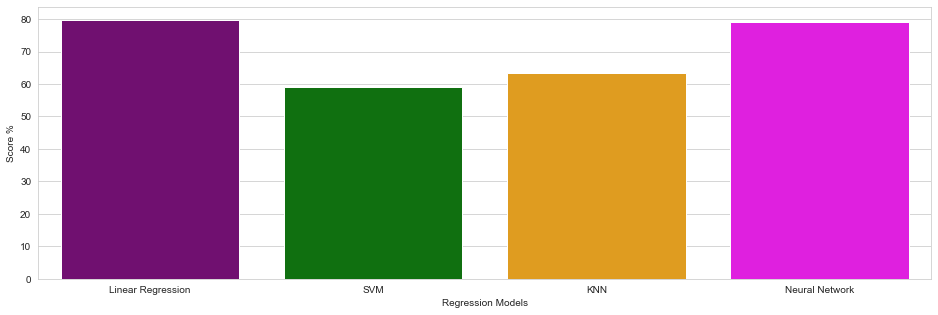

In [68]:
# PLOT THE SCORES FOR REGRESSION MODELS

colors = ["purple", "green", "orange", "magenta"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Score %")
plt.xlabel("Regression Models")
sns.barplot(x=list(Scores_B.keys()), y=list(Scores_B.values()), palette=colors)
plt.show()

# Apply Classification Models (B2)

### B2 Without Encoding

In [69]:
products_subsets_model_B

,p1,p2,p3,p4,p5,p6,p7,average_income
0,0,2,3,4,7,10,14,425.8133
1,2,4,6,8,9,11,13,409.8400
2,3,8,9,10,11,12,14,365.1733
3,2,4,6,7,9,10,12,380.3200
4,3,4,5,8,11,12,16,298.6933
...,...,...,...,...,...,...,...,...
7837,1,2,6,7,8,10,13,466.0000
7838,0,1,2,3,7,12,14,425.0133
7839,3,6,7,10,12,13,15,468.6667
7840,0,1,2,3,5,6,10,432.6933


In [70]:
X = products_subsets_model_B.iloc[:,:-1].values
y = products_subsets_model_B.iloc[:,-1].values

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [72]:
mean_train_income = y_train.mean()
mean_train_income

408.57757438227316

In [73]:
trainset_labels = (y_train > mean_train_income).astype(int)
testset_labels = (y_test > mean_train_income).astype(int)

In [74]:
y_train = trainset_labels

In [75]:
y_test = testset_labels

### SVM

In [76]:
svm = SVC(kernel='linear', random_state = 0)
svm.fit(X_train,y_train)

SVC(kernel='linear', random_state=0)

In [77]:
y_pred = svm.predict(X_test)
acc = accuracy_score(y_test, y_pred)*100
print(f"The accuracy is: {acc}")

The accuracy is: 58.189929891650735


### Logistic Regression

In [78]:
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)

LogisticRegression()

In [79]:
y_pred = logisticRegr.predict(X_test)
acc = accuracy_score(y_test, y_pred)*100
print(f"The accuracy is: {acc}")

The accuracy is: 57.87125557680051


### KNN

In [80]:
KNN = KNeighborsClassifier(n_neighbors = 5) 
KNN.fit(X_train, y_train)

KNeighborsClassifier()

In [81]:
y_pred = KNN.predict(X_test)
acc = accuracy_score(y_test, y_pred)*100
print(f"The accuracy is: {acc}")

The accuracy is: 71.63798597833015


### B2 With Encode (get_dummies)

In [82]:
encoded_B = pd.get_dummies(products_subsets_model_B, columns = ['p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7'])
encoded_B

,average_income,p1_0,p1_1,p1_2,p1_3,p1_4,p1_5,p1_6,p1_7,p1_8,...,p7_7,p7_8,p7_9,p7_10,p7_11,p7_12,p7_13,p7_14,p7_15,p7_16
0,425.8133,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,409.8400,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,365.1733,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,380.3200,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,298.6933,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7837,466.0000,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7838,425.0133,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7839,468.6667,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7840,432.6933,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [83]:
X = encoded_B.iloc[:,1:].values
y = encoded_B.iloc[:,0].values

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [85]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(6273, 77) (1569, 77) (6273,) (1569,)


In [86]:
mean_train_income = y_train.mean()
mean_train_income

408.57757438227316

In [87]:
trainset_labels = (y_train > mean_train_income).astype(int)
testset_labels = (y_test > mean_train_income).astype(int)
print(trainset_labels.shape, testset_labels.shape)

(6273,) (1569,)


In [88]:
y_train = trainset_labels
y_test = testset_labels

### SVM

In [89]:
svm = SVC(kernel='linear', random_state=0)
svm.fit(X_train, y_train)  # connect model with data

SVC(kernel='linear', random_state=0)

In [90]:
y_pred = svm.predict(X_test)
acc = accuracy_score(y_test, y_pred)*100
print(f"The accuracy is: {acc}")

The accuracy is: 84.83110261312939


### Logistic Regression

In [91]:
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)

LogisticRegression()

In [92]:
y_pred = logisticRegr.predict(X_test)
acc = accuracy_score(y_test, y_pred)*100
print(f"The accuracy is: {acc}")

The accuracy is: 85.08604206500956


### KNN

In [93]:
KNN = KNeighborsClassifier(n_neighbors = 5) 
KNN.fit(X_train, y_train)

KNeighborsClassifier()

In [94]:
y_pred = KNN.predict(X_test)
acc = accuracy_score(y_test, y_pred)*100
print(f"The accuracy is: {acc}")

The accuracy is: 75.78075207138305
